In [1]:
#source TFAvenv/bin/activate (launching and exiting the virtual environment containing the required modules, stored in the working directory)
#TFAvenv/bin/python your_script.py - for running a script in the virtual environment
#source deactivate

#import all the libraries needed
from import_dep import *

# import my functions stored in the file 'functions' which can then be called with functions.function_name()
from TFA_functions import XRD_RSM

# Define the path to the root directory containing all the XRD data
root_XRD = '/Users/horatiocox/Desktop/RUG_Postdoc/Experiments/XRD'


# Parameters
plt.style.use(['science', 'grid'])  # Use 'science' style with grid for plotting
plot_data = False # set to True to plot the data and export to path_out
fig_format = 'png' # format of the figure to be saved

powerpoint_data = False # set to True to export the data to a powerpoint presentation and export to path_out

film_thickness = 1e-9 # Film thickness in meters



## Extract RSM Data

In [2]:
# The data is loaded from a folder, then the plots are returned to that same folder
d_1 = XRD_RSM(root_XRD, folder_name = 'HC015')


[PosixPath('/Users/horatiocox/Desktop/RUG_Postdoc/Experiments/XRD/HC015/HC015_LSO_BSO_STO_RSM.csv')]
Points per scan: 631
33
        2Theta position  Omega position  Intensity
0             67.025648         12.9831          7
1             67.045343         12.9831          3
2             67.065039         12.9831         10
3             67.084734         12.9831          7
4             67.104429         12.9831          5
...                 ...             ...        ...
196236        79.354983         22.2831          7
196237        79.374679         22.2831          6
196238        79.394374         22.2831          8
196239        79.414069         22.2831         16
196240        79.433765         22.2831         12

[196241 rows x 3 columns]
(196241, 3)
2Theta unique values: 631 Omega unique values: 311


## 2D Plot of RSM

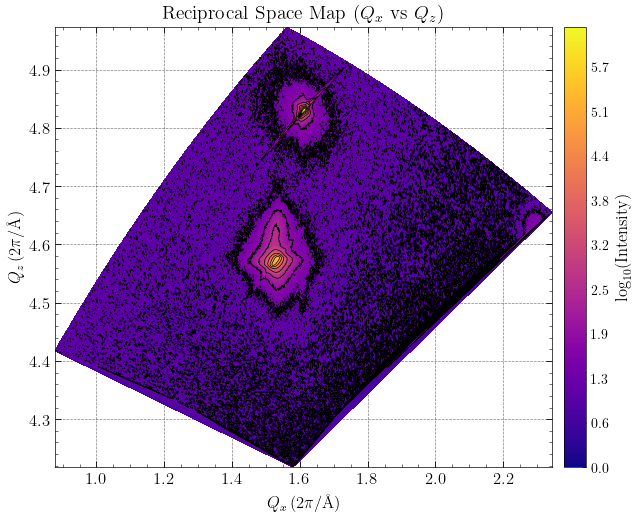

In [3]:
#def plot_2D(self, threshold_filt: float = 1e-99, log_scale: bool = True, x_lim = [1.35, 2.05], y_lim = [4.8, 5.29], plot_type = 'contour'):
fig1 = d_1.plot_2D(threshold_filt = 0, log_scale = True, plot_type = 'contour')



## 3D Plot of RSM

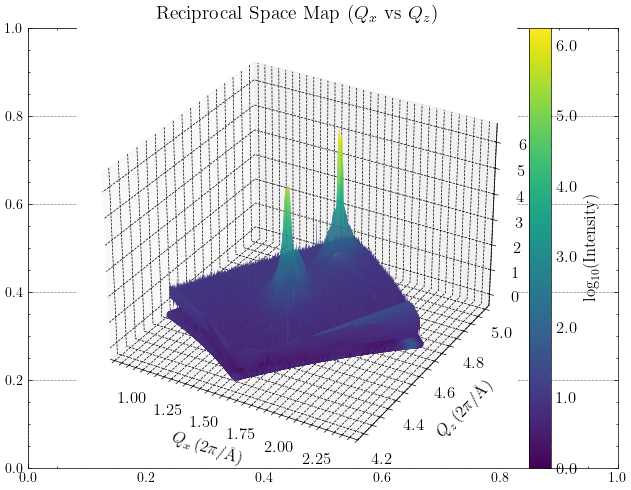

In [4]:
fig2 = d_1.plot_3D(threshold_filt = 0, log_scale = True)


In [5]:
if powerpoint_data == True:
    # Create a PowerPoint presentation object
    prs = Presentation()

    # Define a function to add a slide with a title and image
    def add_slide(prs, title, fig):
        slide_layout = prs.slide_layouts[5]  # Use a blank slide layout
        slide = prs.slides.add_slide(slide_layout)
        
        # Set background color with 40% transparency
        background = slide.background
        fill = background.fill
        fill.solid()
        fill.fore_color.rgb = RGBColor(200, 200, 200)

        # Add title with custom font
        title_shape = slide.shapes.title
        title_shape.text = title
        title_shape.text_frame.paragraphs[0].font.size = Pt(24)
        title_shape.text_frame.paragraphs[0].font.bold = True
        title_shape.text_frame.paragraphs[0].font.color.rgb = RGBColor(0, 0, 0)
        title_shape.text_frame.paragraphs[0].font.name = 'Arial'
        title_shape.text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER

        # Save the figure as an image
        img_path = f"{title}.png"
        fig.savefig(img_path, dpi=300, bbox_inches='tight', transparent=True)

        
         # Calculate the left position to center the image
        slide_width = prs.slide_width
        image_width = Inches(8)
        left = (slide_width - image_width) / 2
        top = Inches(2)  # Position the figure lower down by 2 inches
        
        # Add the image to the slide
        pic = slide.shapes.add_picture(img_path, left, top, width=image_width)

    # List of figures and their corresponding titles
    figures = [
        (fig0, "Plot IV data to Check Linearity"),
        (fig1, "R-squared Analysis to Check Linearity of I-V data"),
        (fig2, "Resistivity Configuration Compararison"),
        (fig3, "Resistivity vs Temperature"),
        (fig4, "Magnetoresistance vs H"),
        (fig5, "Magnetoresistance Vs T"),
        (fig6, "Arhenius Plot"),
        (fig7, "R-squared Analysis to Check Linearity of Resistivity I-V data"),
        (fig8, "Hall resisitivity vs Temperature"),
        (fig9, "Hall resisitivity vs Applied Field"),
        (fig10, "Hall Coeff Vs T"),
        (fig11, "Mobility vs T"),
        (fig12, "ρ_xy vs ρ_xx")
    ]

    # Add each figure to the PowerPoint presentation
    for fig, title in figures:
        add_slide(prs, title, fig)

    # Save the PowerPoint presentation
    prs.save(Path(path_out).joinpath(f'{plot_string}_figures.pptx'))